# Линейная алгебра. Лабораторная работа 1, зима 2022, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [3]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
zeros = np.zeros((3, 4))
print(zeros)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
diag = np.diag(np.arange(1, 6))
diag

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [14]:
diag.trace()

15

In [15]:
np.linalg.inv(diag)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

In [37]:
x = np.random.rand(4, 5)
x

array([[0.44537518, 0.85934232, 0.14408071, 0.39003805, 0.85531221],
       [0.3483331 , 0.80004203, 0.36671208, 0.62905749, 0.56795294],
       [0.46900915, 0.05562738, 0.86098782, 0.07587174, 0.43985105],
       [0.60644477, 0.61531779, 0.02857124, 0.32068347, 0.17684519]])

In [38]:
print(x[1:3, 0:2])
np.linalg.det(x[1:3, 0:2])

[[0.3483331  0.80004203]
 [0.46900915 0.05562738]]


-0.35585017341900793

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [58]:
def my_det(x):
    det = 1
    m, n = x.shape
    if m != n:
        return ValueError
    x = x.astype(float)
    for i in range(n):
        err = 0
        for j in range(i, n):
            if x[i, j] != 0:
                err = 1
                break
        if err == 0:
            return 0
        if j == i:
            det /= x[i, i]
            for t in range(i + 1, n):
                x[i, t] /= x[i, i]
            x[i, i] = 1
            for line in range(i):
                fix = x[line, i]
                for k in range(i, n):
                    x[line, k] -= x[i, k] * fix
            for line in range(i + 1, n):
                fix = x[line, i]
                for k in range(i, n):
                    x[line, k] -= x[i, k] * fix
        else:
            det *= -1
            for k in range(n):
                x[i, k], x[j, k] = x[j, k], x[i, k]
            det /= x[i, i]
            for t in range(i + 1, n):
                x[i, t] /= x[i, i]
            x[i, i] = 1
            for line in range(i):
                fixi = x[line, i]
                for k in range(i):
                    x[line, k] -= x[i, k] * fixi
            for line in range(i + 1, n):
                fixi = x[line, i]
                for k in range(i, n):
                    x[line, k] -= x[i, k] * fixi
    return 1 / det
x = np.array([[1, 2], [3, 4]])
print(x)
my_det(x)

[[1 2]
 [3 4]]


-2.0

Простая проверка:

In [59]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [60]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно. 

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

13.6 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
294 µs ± 6.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.67 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
236 ms ± 6.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.74 ms ± 724 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.3 s ± 66.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


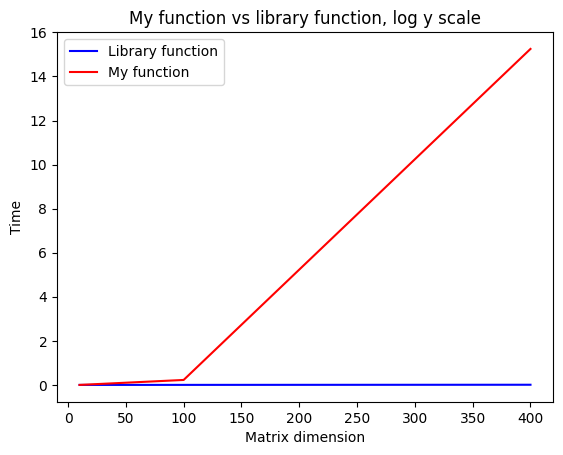

In [64]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 400]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

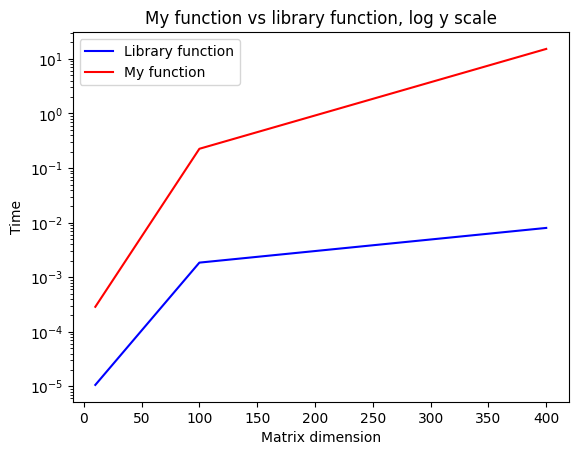

In [65]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$ \begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix} $$
и
$$ \begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix} $$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [67]:
A = np.array([[1, 0], [10 ** 20, 1]])
B = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
print(A.dot(B))
A = np.array([[1., 0.], [10. ** 20, 1.]])
B = np.array([[10. ** (-20), 1.], [0., 1. - 10. ** 20]])
print(A.dot(B))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [91]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0, i] = 1
    for i in range(1, dim):
        for j in range(dim):
            P[i, j] = P[i - 1, j] * (i + j) / i
    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение** \
Её определитель равен 1. \
Приведу док-во по индукции по ко-ву строк. \
База - очев. \
Переход - Из нижней строки вычтем 2-ую снизу. Из 2-ой снизу
вычтем 3-ю снизу и тд (из 1-ой сверху ничего не вычитаем , тк C(n, m) = C(n - 1, m) + C(n - 1, m - 1)). \
Тогда после таких преобразований прийдем к следующей
матрице - \
первый столбец очев выглядит так - 1 0 0 ... 0 (слева направо <=> сверху вниз). \
Если выкинуть 1-ый столбец и 1-ую строку то останется кв. матрица со строками на 1 меньше, причем это матрица для которой известно ПИ (ее det =) \
Отсюда det = 1

А теперь вычислите определитель матрицы Паскаля $20\times20$ с помощью библиотечной функции `scipy.linalg.det`:

In [94]:
sla.det(my_pascal(20))

178.4926872722274

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [96]:
def prod_and_sq_sum(A):
    prod = np.diag(A).prod()
    v = np.diag(A)
    sum = v.dot(v.T)
    return [prod, sum]
A = np.array([[2, 10], [2, 13]])
print(prod_and_sq_sum(A))
A = np.array([[0, 10, 1], [2, 4, 13], [4, 9, -1]])
print(prod_and_sq_sum(A))


[26, 173]
[0, 17]


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [97]:
def f(A, B, k):
    k = min(k, n)
    A = A[:k + 1,:]
    B = B.T[:k + 1,:]
    return A.dot(B)
A = np.array([[1, 2], [3, 4]])
B = np.array([[0, 1], [4, 4]])
n = 2
k = 2
print(f(A, B, k))

[[ 2 12]
 [ 4 28]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [99]:
def get_diag(A, B):
    return np.einsum('ij, ji->i', A, B)
# tests
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 1], [4, 1]])
print(get_diag(A, B))

[9 7]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [100]:
import math
def shrink_rotate(X, A, coef=1., angle=0.):
    v = (math.cos(angle) + math.sin(angle) * 1j)
    return (X - A) * coef * v + A
# tests
print('5.1', shrink_rotate(1 + 2 * 1j, 2 + 3 * 1j, 2, 2))
def shrink_rotate_conj(X, A, coef=1., angle=0.):
    v = (math.cos(angle) + math.sin(angle) * 1j)
    ans1 = (X - A) * coef * v + A
    return ans1.conjugate()
# tests
print('5.2', shrink_rotate_conj(2 + 8 * 1j, 2 + 1 * 1j, 4, 7))

def geometric_inverse(X, A, r):
    return A + (X - A) * r * r / abs(X - A)
# tests
print('5.3', geometric_inverse(1 + 2 * 1j, 2 + 1j, 2))

5.1 (4.650888526745648+2.0136988194429213j)
5.2 (-16.395624764126094-22.10926312161253j)
5.3 (-0.8284271247461898+3.82842712474619j)


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

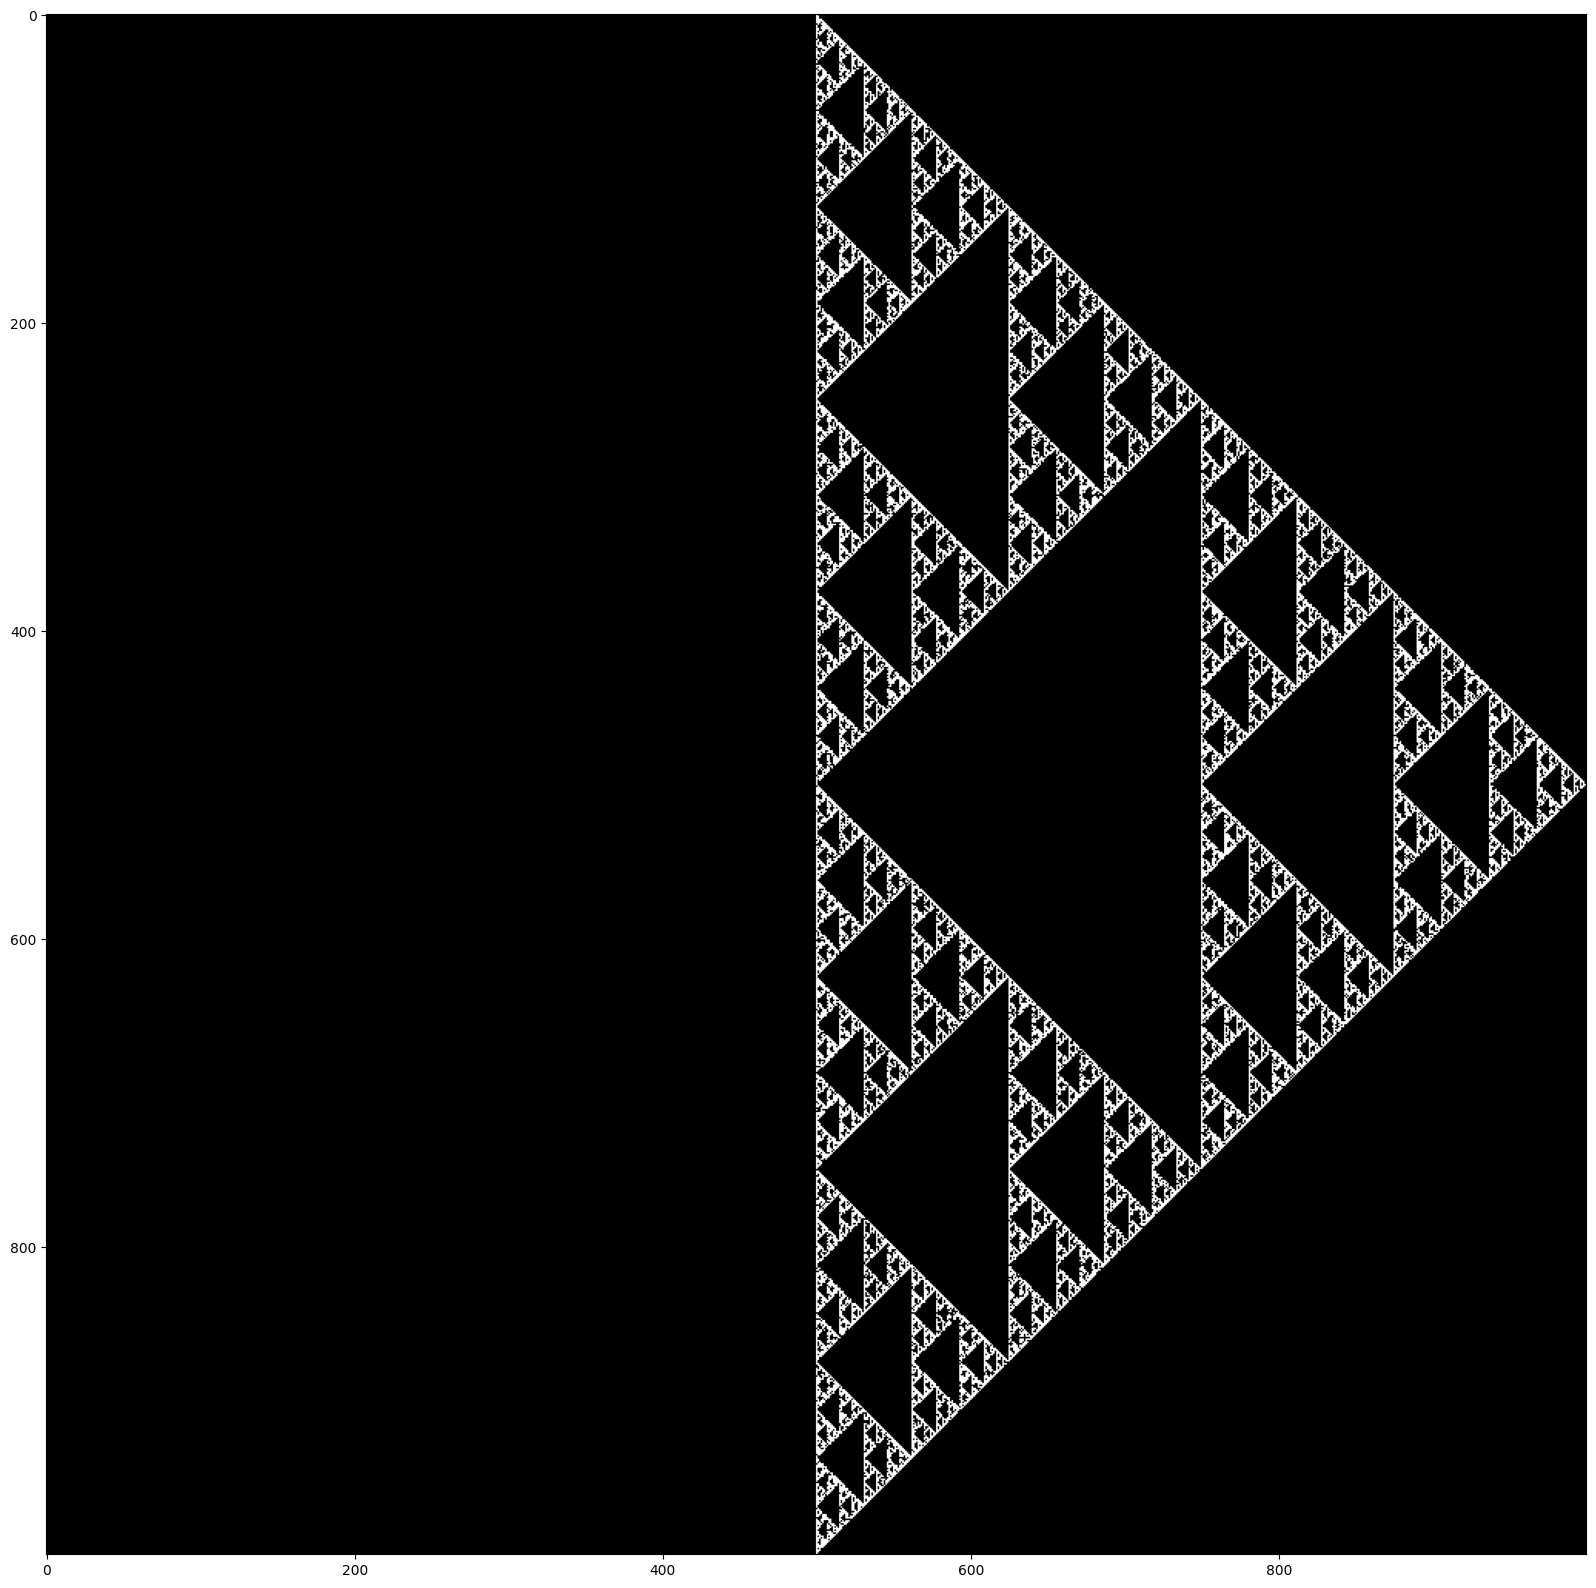

In [101]:
z = 0.5 + 0.*1j
A = np.zeros([1000, 1000])
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 9:
        reall = int((z.real + 1) * 500)
        img = int((z.imag + 1) * 500)
        A[reall][img] = 1
plt.figure(figsize=(20, 20))
plt.imshow(A, cmap='gray')


**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
На каждом ходе мы делаем гомотетию с центром в нашей точке и коэф -
1/2. . Точка при этом переходит в соответствующую в другом треугольнике

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

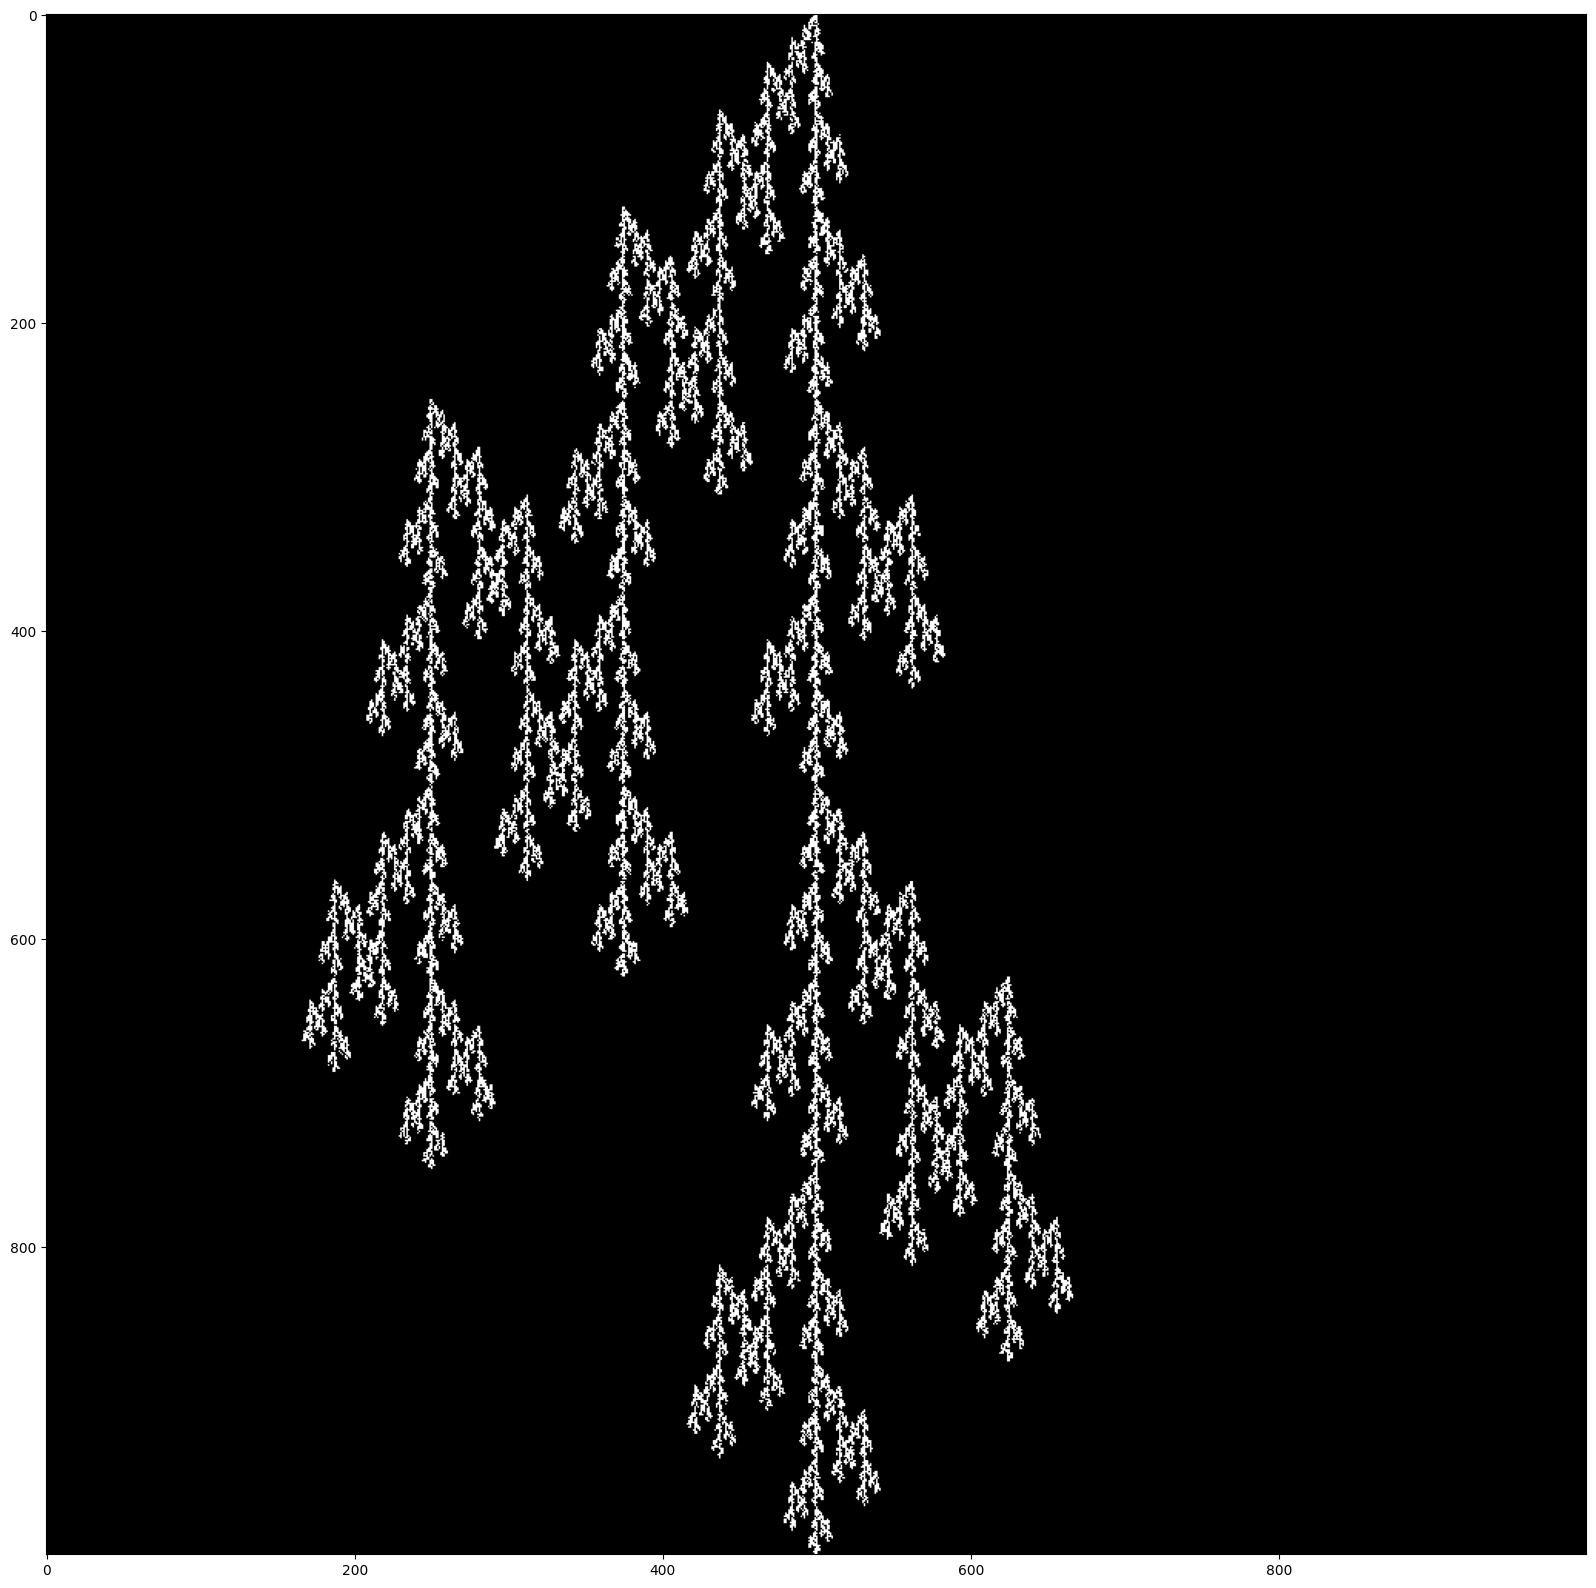

In [103]:
z = 0.5 + 0.*1j
A = np.zeros([1000, 1000])
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 9:
        reall = int((z.real + 1) * 500)
        img = int((z.imag + 1) * 500)
        A[reall][img] = 1
plt.figure(figsize=(20, 20))
plt.imshow(A, cmap='gray')

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 221:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 222:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 223:

`A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])`

- у группы 224:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. 

In [106]:
A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])
n = 4
X_a = np.poly(A)
# очев разложение (снизу [корень, кратность])
roots = [[2, 2], [1, 2]]
koff = np.array([[1, 1, 1, 1], [3, 2, 1, 0], [8, 4, 2, 1], [12, 4, 1, 0]])
ans = np.array([math.e, math.e, (math.e) ** 2, (math.e) ** 2])
g = sla.solve(koff, ans)
B = np.eye(4) * g[3] + A * g[2] + A.dot(A) * g[1] + A.dot(A.dot(A)) * g[0]
print(B)


[[ 38.89777294 -15.54390158 -32.27450622 -19.44888647]
 [-50.95760331  20.98046524  42.38184415  26.83794257]
 [ 65.7357155  -20.98046524 -49.77090025 -34.22699867]
 [-17.49639403  -2.71828183   7.3890561   10.10733793]]


In [110]:
A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])
n = 4
X_a = np.poly(A)
# очев разложение (снизу [корень, кратность])
roots = [[2, 2], [1, 2]]
koff = np.array([[1, 1, 1, 1], [3, 2, 1, 0], [8, 4, 2, 1], [12, 4, 1, 0]])
ans = np.array([math.sin(1), math.cos(1), math.sin(2), math.cos(2)])
g = sla.solve(koff, ans)
S = np.eye(4) * g[3] + A * g[2] + A.dot(A) * g[1] + A.dot(A.dot(A)) * g[0]
print(S)

[[-1.22776578 -0.1804845   1.12428504  0.76446723]
 [ 2.90153044  0.5379822  -2.02440516 -1.18061407]
 [-3.73382411  0.78746206  3.76599626  1.5967609 ]
 [ 0.29199137 -1.56457789 -1.44042242  0.42532415]]


In [115]:
A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])
n = 4
X_a = np.poly(A)
# очев разложение (снизу [корень, кратность])
roots = [[2, 2], [1, 2]]
koff = np.array([[1, 1, 1, 1], [3, 2, 1, 0], [8, 4, 2, 1], [12, 4, 1,
0]])
ans = np.array([math.cos(1), -math.sin(1), math.cos(2), -math.sin(2)])
g = sla.solve(koff, ans)
T = np.eye(4) * g[3] + A * g[2] + A.dot(A) * g[1] + A.dot(A.dot(A)) * g[0]
print(T)
np.allclose(S.dot(S) + T.dot(T), np.eye(4))

[[-4.1683147   2.54508768  4.47866069  2.775044  ]
 [ 6.52721186 -1.95763366 -5.3408064  -3.68434142]
 [-8.34580671  2.45078425  6.74325442  4.59363885]
 [ 2.66006584  1.73009369 -0.02067473 -0.36899512]]


True

In [116]:
n = 4
p = math.e
koff = np.array([[p ** 3, p ** 2, p, 1], [3 * p ** 2, 2 * p, 1, 0], [p ** 6, p ** 4, p ** 2, 1], [3 * p ** 4, 2 * p ** 2, 1, 0]])
ans = np.array([1, 1/math.e, 2, 1/(math.e ** 2)])
g = sla.solve(koff, ans)
print(np.eye(4) * g[3] + B * g[2] + B.dot(B) * g[1] + B.dot(B.dot(B)) * g[0])
np.allclose(np.eye(4) * g[3] + B * g[2] + B.dot(B) * g[1] + B.dot(B.dot(B)) * g[0], A)

[[ 6.00000000e+00 -3.00000000e+00 -5.00000000e+00 -3.00000000e+00]
 [-7.00000000e+00  4.00000000e+00  6.00000000e+00  4.00000000e+00]
 [ 9.00000000e+00 -3.00000000e+00 -6.00000000e+00 -5.00000000e+00]
 [-3.00000000e+00 -2.00000000e+00  3.55271368e-15  2.00000000e+00]]


True

Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [117]:
t = 0.01
ans = np.eye(4)
ans_list = [np.eye(4)]
k = 1
while ans_list[-1].max() >= t:
    ans_list.append(ans_list[-1].dot(A)/k)
    ans += ans_list[-1]
    k += 1
print(ans)

[[ 38.89750724 -15.54378883 -32.27426064 -19.44875361]
 [-50.95721483  20.98030118  42.38148587  26.83774832]
 [ 65.73520425 -20.98024987 -49.77042927 -34.22674303]
 [-17.49627122  -2.71833308   7.38894343  10.10727654]]


In [118]:
A = np.random.rand(10, 10)
coss = np.eye((A.shape[0]))
i = 1
coss_list = np.eye(A.shape[0])
while True:
    coss_list = (-1) * ((coss_list.dot(A)).dot(A)) / ((2 * i - 1) * (2 * i))
    coss += coss_list
    if abs(np.amax(coss_list)) < t:
        break
    i += 1
sinn = A.copy()
i = 1
sinn_list = A.copy()
while True:
    sinn_list = (-1) * ((sinn_list.dot(A)).dot(A)) / ((2 * i) * (2 * i + 1))
    sinn += sinn_list
    if abs(np.amax(sinn_list)) < t:
        break
    i += 1
anss = sinn.dot(sinn) + coss.dot(coss)
for i in range(anss.shape[0]):
    for j in range(anss.shape[0]):
        anss[i, j] = round(anss[i, j])
print(anss)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
